SAS & HSE, Applied Time Series Forecasitng , Fall 2023

<font color="green"> HW #1 </font>

<span style="color:black; font-size: 12pt"></span>

You can find hw1 bonus part <a href= "https://github.com/aromanenko/ATSF/blob/main/HW1_bonus_part.ipynb">here</a>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>


<h1 align="center">Organization Info</h1>

**Дополнительный материал для выполнения дз**:
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- https://otexts.com/fpp2/expsmooth.html

**Оформление дз**:
- Присылайте выполненное задание в гугл-форму https://forms.gle/G9e9L3ue3cFhNppf7
- Выполненное дз сохраните в файл <Surname>_ts2023_24_hw1.ipynb, например, ivanov_ts2023_24_hw1.ipynb

**Вопросы**:
- Присылайте вопросы в телеграм в соответствующий канал

**Deadilne**: <font color="red"> 03-Dec-2023 11:59:59 pm CET </font>

В случае присланного решения позже дедлайна максимальный бал буде снижен согласно формуле (-1 балл за просрочку дедлайна в одну неделю):

$$МаксимальныйБалл=max\bigl(6,(10-ДнейПослеДедлайна/7) \bigr).$$
График зависимости максимально возможного балла за ДЗ от просрочки дедлайна приведён ниже:

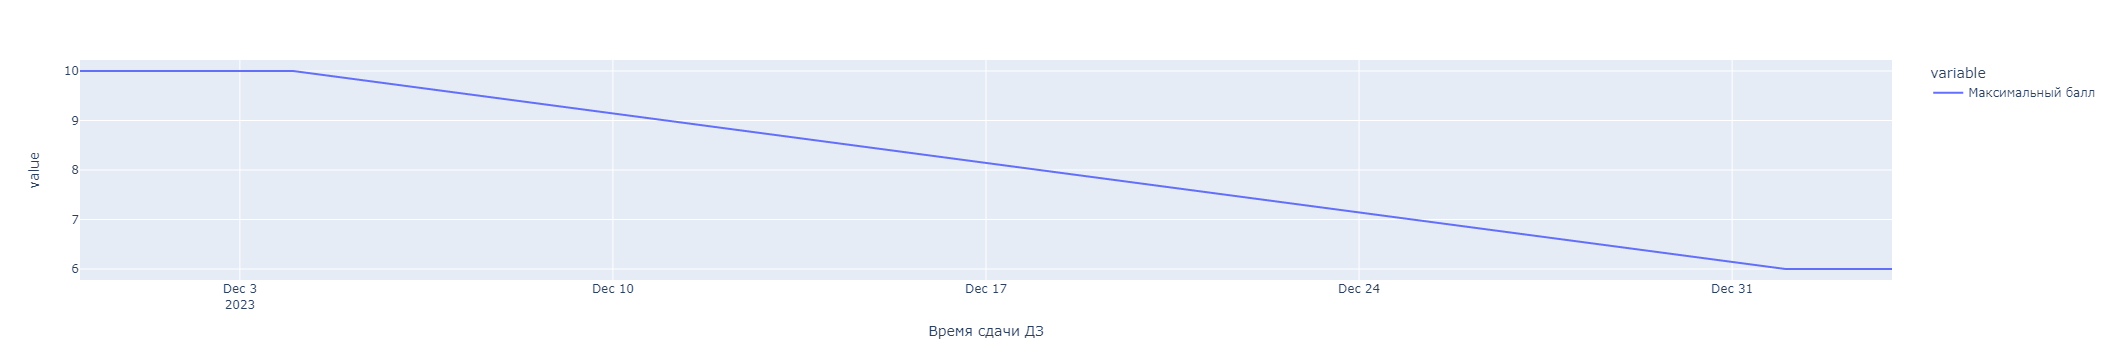

In [132]:
import pandas as pd
import numpy as np
import datetime

import math

pd.options.plotting.backend = "plotly"
deadline_dttm = pd.to_datetime('2023-12-04 00:00:00')

# Addtional imports for offline work
import plotly.io as pio
pio.renderers.default = 'notebook'
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
pd.options.plotting.backend = "plotly"



pd.DataFrame(data = [[deadline_dttm+datetime.timedelta(days=x)
                          , min(10, max(6, (10-x/7)))] for x in np.linspace(-4,30,35000)],
                          columns = ['Время сдачи ДЗ', 'Максимальный балл']).set_index('Время сдачи ДЗ').\
  plot().update_layout(height=350, width=1350).show()

<h1 align="center">Check Questions (5%)</h1>

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма Simple Exponential Smoothing при изменении параметра $\alpha$ от 0 до 1.

<Ответ>

**Вопрос 2**: Докажите равенство выражений в $\color{green}{рекуррентной~форме}$ и в $\color{red} {форме~корректировки~на~ошибку}$ для модели Винтерса.

$$\hat{y}_{t+d} = \hat l_t +  \hat s_{t+(d\mod p) - p}; \\
		\hat l_{t}       	=  \color{green}{\alpha \left(y_t - \hat s_{t-p}\right)+ \left(1-\alpha\right) \left(\hat l_{t-1}\right)}=\color{red}{\hat l_{t-1} + \alpha e_t}; \\
		\hat s_t         	= \color{green}{\gamma\left(y_t- \hat l_{t}\right) + \left(1-\gamma\right)\hat s_{t-p} }= \color{red}{\hat s_{t-p} + \gamma(1-\alpha)e_t}.
		$$


<Ответ>

**Вопрос 3**: Каким следует выбрать параметр сглаживания тренда $\beta$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

<Ответ>


<h1 align="center"> Practice</h1>

#1. reading data (5%)

Download data and prepare for following time series
 * <span style="color:blue; font-family:'New Times Roman'; font-size:14pt"> description of the target ts you can find here  https://docs.google.com/spreadsheets/d/12XQzA5a-vlWYGRrQaPfH5Qw61wsVQ8qwK7O4EZnPMRU/edit#gid=39924685 </span> sheet "TS" column G ("HW1 ts")



In [9]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

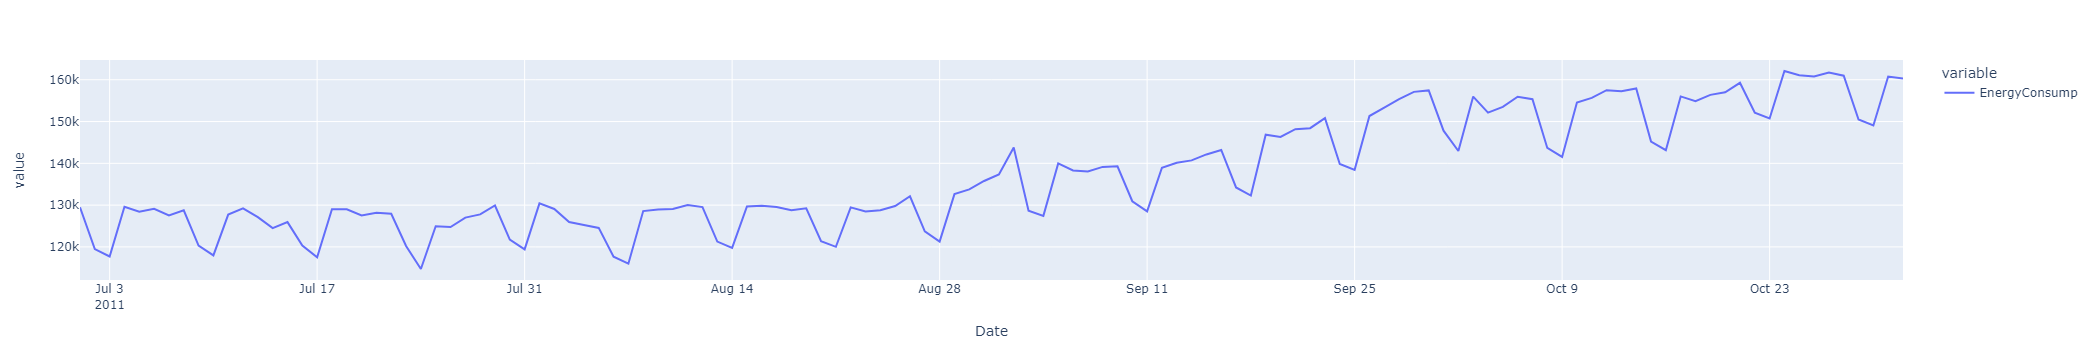

In [103]:
# start with this code
import pandas as pd
import numpy as np
from utils import InitExponentialSmoothing, build_forecast, plot_ts_forecast
from utils import qualityMAPE

from matplotlib import pyplot as plt

%matplotlib inline


# ts = pd.read_csv('???/mothly_ts.csv', sep=???, decimal=???, index_col=???, parse_dates=True, dayfirst=True)

ts = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/33b78c9be63831567f8036ad40c5859e824d30f7/data/energy_consump.csv', decimal='.', parse_dates=['Date'], dayfirst=False, index_col='Date')
ts = ts[(ts['ZSP']=='FZSZOE27') & (ts['Hub']=='Center')]['EnergyConsump']['2011-07-01':'2011-11-01']

# # Put your code below
ts.plot()
# ts.plot(figsize=(15,5)) # doesn't work after switch to Plotly

# 2. Build the Forecast with  SES (20%)

You need to apply SES model for the ts.
You can use code from seminars or you can write down your own code using any python lib.

Forecast delay $h=1$ for all point in this task.

* 0) Forecast the ts with SES $\alpha=.1$.
* 1) Split the ts to 4 equal parts: find the best param $\alpha$ of SES for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Is the optimal value close to 0 or 1? (use MAPE as a loss function).
* 2) Draw the forecast that correspond to SES with optimial value $\alpha$
     Conclude whether SES can be used for this TS? If can not than explain why.
* 3) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts.

---



## Functions from Seminars

In [104]:
# Simple Exponential Smoothing
# x <array Tx1>- time series,
# h <scalar> - forecasting delay
# Params <dict> - dictionary with
#    alpha <scalar in [0,1]> - smoothing parameter

def SimpleExponentialSmoothing(x, h=1, Params={}):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    # initialization
    y = x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(y):
                y=x[cntr]
            y = alpha*x[cntr] + (1-alpha)*y  # = y + alpha*(x[cntr]-y)
            #else do not nothing
        FORECAST[cntr+h] = y # academic forecast, for ML training
        # FORECAST_PRODUCTION = FORECAST
        # FORECAST_PRODUCTION[T:] = FORECAST_PRODUCTION[T+h] # production forecast
    return FORECAST #, FORECAST[T+h]

In [105]:
def plot_ts_forecast(ts, frc_ts, ts_num=0, alg_title=''):
    frc_ts.columns = frc_ts.columns+'; '+alg_title
    ts[[ts.columns[ts_num]]].merge(frc_ts[[frc_ts.columns[ts_num]]], how = 'outer', left_index = True, right_index = True)\
      .plot().update_layout(height=350, width=1300,
                  xaxis_title="time ticks",
                  yaxis_title="ts and forecast values").show()
    return

In [117]:
def qualityMAPE(x,y):
    # Mean absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = ((x-y).abs()/x.abs()).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , qlt

## 0. Forecast the ts with SES alpha = .1

In [111]:
# Forecast delay = 1
h = 1
start = ts.index[-1]+datetime.timedelta(1)
end = ts.index[-1]+datetime.timedelta(h)
rng = pd.date_range(start, end)

# ts перекладываем в DataFrame, чтобы воспользоваться готовым кодом с семинаров
ts = pd.DataFrame(ts)
ts.rename(columns={"EnergyConsump": "Actual"}, inplace=True)

# Создаем пустой DataFrame под будущий прогноз
frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ['Forecast'])

In [112]:
ts.head(5)

Actual
Date                  
2011-07-01  129496.586
2011-07-02  119473.726
2011-07-03  117710.248
2011-07-04  129625.391
2011-07-05  128436.609

In [113]:
frc_ts.head()

Forecast
2011-07-01      NaN
2011-07-02      NaN
2011-07-03      NaN
2011-07-04      NaN
2011-07-05      NaN

In [114]:
# ES params
Params ={'alpha':0.1}

# generate forecasts
frc_ts['Forecast'] = SimpleExponentialSmoothing(ts['Actual'], h, Params)

In [116]:
frc_ts.head()

Forecast
2011-07-01           NaN
2011-07-02  129496.58600
2011-07-03  128494.30000
2011-07-04  127415.89480
2011-07-05  127636.84442

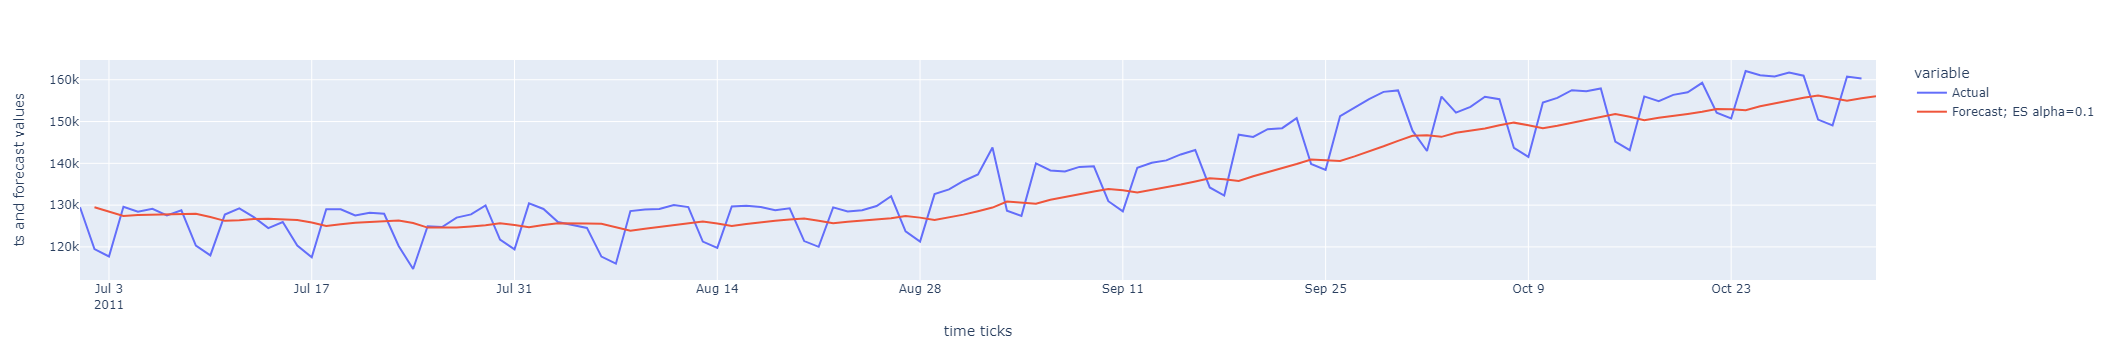

In [118]:
plot_ts_forecast(ts, frc_ts, ts_num=0, alg_title='ES alpha=0.1')

## 1) Search for the optimal $\alpha$

In [191]:
# Function from the seminar

def build_forecast(h, ts, alg_name, alg_title, params, step='D'):
  'grid'

  FRC_TS = dict()

  for p in params:
      frc_horizon = pd.date_range(ts.index[-1], periods=h+1, freq=step)[1:]
      frc_ts = pd.DataFrame(index = ts.index.append(frc_horizon), columns = ts.columns)

      for cntr in ts.columns:
          frc_ts[cntr] = eval(alg_name)(ts[cntr], h, p)

      FRC_TS['%s %s' % (alg_title, p)] = frc_ts

  return FRC_TS

In [195]:
ALPHA = [1, 0.9, 0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01, 0.001, 0.00001]  # put here possible alpha-s
ESparams = [{'alpha':alpha} for alpha in ALPHA]
FRC_ts = build_forecast(h=1, ts=ts, alg_name = 'SimpleExponentialSmoothing', alg_title='SES', params = ESparams)

In [196]:
FRC_ts.keys()

dict_keys(["SES {'alpha': 1}", "SES {'alpha': 0.9}", "SES {'alpha': 0.7}", "SES {'alpha': 0.4}", "SES {'alpha': 0.2}", "SES {'alpha': 0.15}", "SES {'alpha': 0.1}", "SES {'alpha': 0.05}", "SES {'alpha': 0.01}", "SES {'alpha': 0.001}", "SES {'alpha': 1e-05}"])

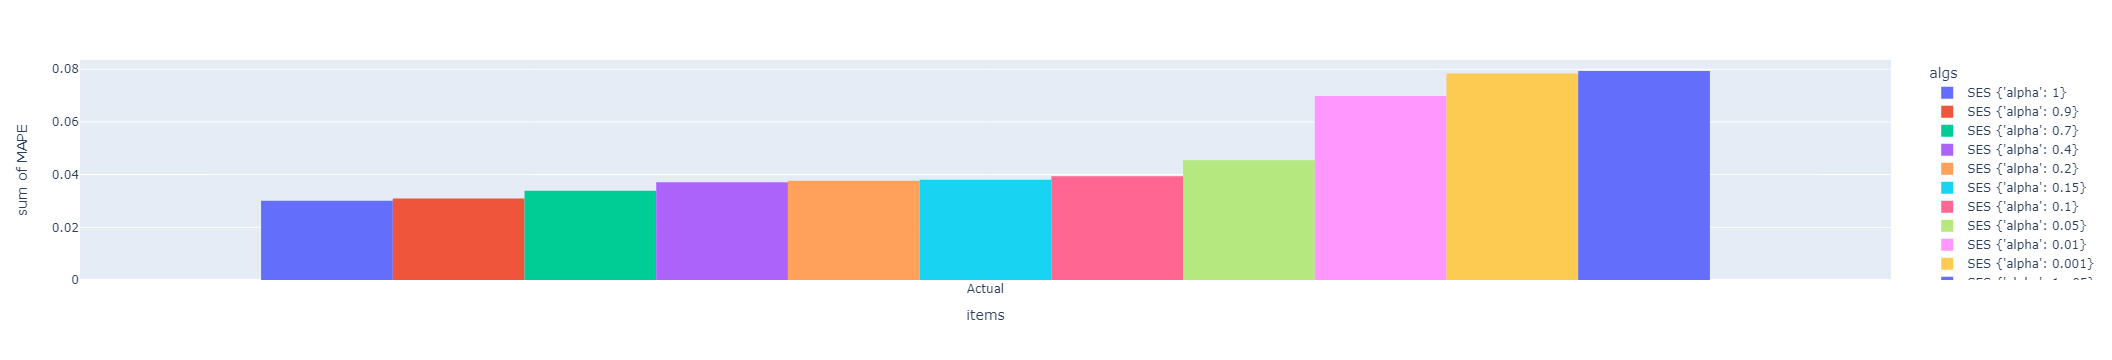

In [197]:
# compare ES parameters
quality_wholehist = pd.DataFrame(index = ts.columns, columns = FRC_ts.keys())

for param_cntr in sorted(quality_wholehist.columns):
    frc_ts = FRC_ts[param_cntr]
    quality_wholehist[param_cntr],_ = qualityMAPE(ts, frc_ts.loc[ts.index])


px.histogram(quality_wholehist.unstack().reset_index().rename(columns = {'level_0':'algs', 'level_1':'items', 0:'MAPE'}), x="items", y="MAPE",
             color='algs', barmode='group')


In [198]:
# compare ES parameters
qlt_ses = pd.DataFrame(index = ts.columns, columns = FRC_ts.keys())

ix = ts.loc['2011-09-01':'2011-09-30'].index # Проверяем на 3 части 
for param_cntr in sorted(qlt_ses.columns):
    frc_ts = FRC_ts[param_cntr]
    qlt_ses[param_cntr],_ = qualityMAPE(ts.loc[ix], frc_ts.loc[ix])

qlt_ses[qlt_ses.columns].mean().sort_values()

SES {'alpha': 1}        0.030386
SES {'alpha': 0.9}      0.031703
SES {'alpha': 0.7}      0.035519
SES {'alpha': 0.4}      0.041152
SES {'alpha': 0.2}      0.045494
SES {'alpha': 0.15}     0.047851
SES {'alpha': 0.1}      0.052131
SES {'alpha': 0.05}     0.063976
SES {'alpha': 0.01}     0.086003
SES {'alpha': 1e-05}    0.086276
SES {'alpha': 0.001}    0.086589
dtype: float64

**Самая низкая величина ошибки по MAPE достигается при использовании alpha = 1.**

## 2) draw the forecast with optimial value $\alpha $

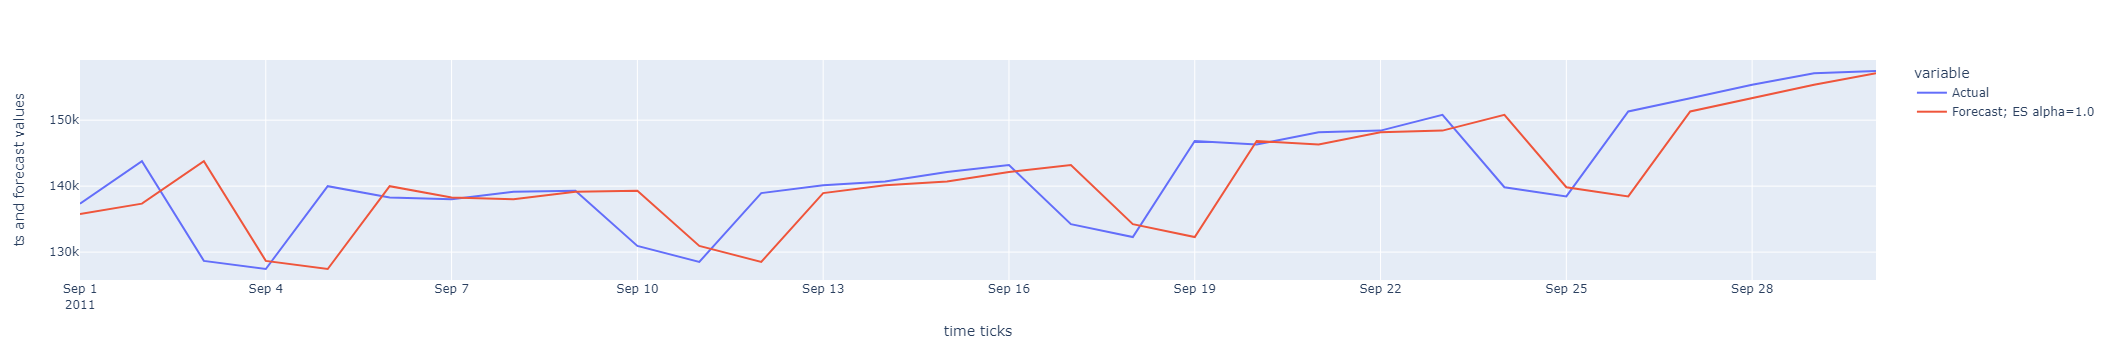

In [203]:
alg_name = qlt_ses[qlt_ses.columns].mean().sort_values().index[0]
FRC_ts = FRC_ts[alg_name].rename({"Actual":"Forecast"}, axis=1)
plot_ts_forecast(ts.loc['2011-09-01':'2011-09-30'], FRC_ts.loc['2011-09-01':'2011-09-30']
               , ts_num=0, alg_title='ES alpha=1.0')

** Question**
    * Does SES follow to the TS components?

**SES demonstrates its drawback: with the best alpha of 1.0 it simply predicts with the latest true value of the TS. Thus we get merely a shift of the TS.**

## 3) Calculate loss of the forecast of TS in 4th part of the time series

In [208]:
qualityMAPE(ts.loc['2011-10-01':'2011-11-01']['Actual'], FRC_ts.loc['2011-10-01':'2011-11-01']['Forecast'])[0] # Считаем на 4 части 

0.03002492510572697

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then apply it to the ts.

You can use code from seminars or you can write down your own code using any python lib.


Forecast delay $h=1$ for all point in this task.

* 1) Realize Additive Winters model
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ for the whole TS
* 4) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of SES: is it better?
* 5) Based on results of 3) and 4) conclude whether Additive Winter's ES is appropriate for this TS.

In [ ]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series,
# h <scalar> - forecasting delay
# Params <dict> - dictionary with
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    p = Params['seasonality_period']

    FORECAST = ## put foreast of the model here

    l= # initialize ts level
    s= # initalize seasonality values (it must be vector of lenth p)

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= # initialize

            if math.isnan(s[cntr % p]):
                s[cntr % p]= # initialize

            l = # recurrent smoothing of level
            s[cntr % p] = # recurrent smoothing of seasonality

        FORECAST[cntr+h] = ??
    return FORECAST

In [ ]:
# Put your code here


# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting the ts.

You can use code from seminars or you can write down your own code using any python lib.


Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$
* 4) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of Additive Winters model: is it better than the last one?
* *5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [ ]:
# Put your code here

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) or/and damped-trend component and then use it for forecasting of the ts

You can use code from seminars or you can write down your own code using any python lib.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M), ESM(Md,M) model.
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
Note: if you seelct damped trend model then you can set  $\phi$ value expertly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params.
* 4) Calculate accuracy of the forecast of TS based on 4-th part of the ts. Compare it with accuracy of Additive Winters model and Theil-Wage model, which model is the best?
* 5) Will be results the same if forecas horizon is different (h = seasonlaity period of data)? Please give reasons for your answer.

In [ ]:
# Put your code here